In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
#pip install xgboost

In [3]:
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('../data/processed_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [5]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#here we will be trainig  a logisitc regression model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log = log_reg.predict(X_test)

print(accuracy_score(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

0.8211497515968772
[[934 102]
 [150 223]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [7]:
#here we will be training a random forrest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_rf_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_rf_pred))
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))


0.7927608232789212
[[940  96]
 [196 177]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [8]:
#Here we will be training XGBoost  

XGB = XGBClassifier()

XGB.fit(X_train,y_train)

y_XGB_pred = XGB.predict(X_test)
print(accuracy_score(y_test,y_XGB_pred))
print(confusion_matrix(y_test,y_XGB_pred))
print(classification_report(y_test,y_XGB_pred))

0.7892122072391767
[[926 110]
 [187 186]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Now lets tune all these moddels and try to get better results

In [9]:
#Tunning and analysing the Logistic Regression Model
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid.best_params_)

Best Parameters for Logistic Regression: {'C': 100}


Top 10 Important Features (Logistic Regression):
Contract_Two year                 1.393039
tenure                            1.338958
InternetService_Fiber optic       0.992466
Contract_One year                 0.636088
TotalCharges                      0.626486
PhoneService_Yes                  0.515758
OnlineSecurity_Yes                0.402374
StreamingMovies_Yes               0.367158
PaperlessBilling_Yes              0.332317
PaymentMethod_Electronic check    0.323456
dtype: float64


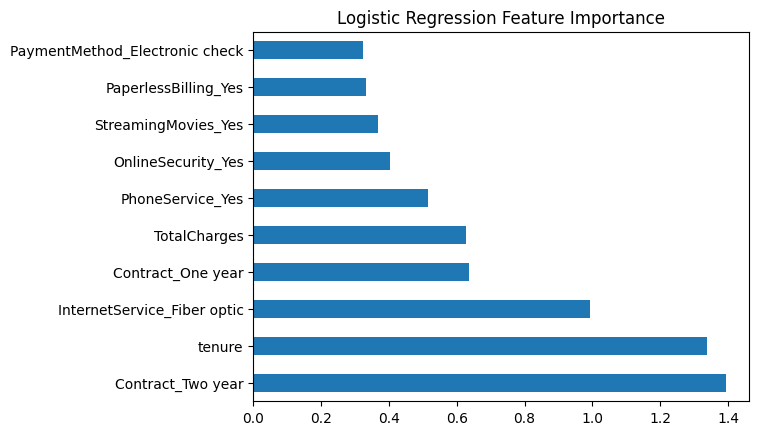

In [10]:
log_coeff = pd.Series(log_reg.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("Top 10 Important Features (Logistic Regression):")
print(log_coeff.head(10))

log_coeff.head(10).plot(kind='barh', title="Logistic Regression Feature Importance")
plt.show()

Lets take a look at Random Forest

In [11]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid.best_params_)

Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}


Top 10 Important Features (Random Forest):
TotalCharges                      0.196647
tenure                            0.169706
MonthlyCharges                    0.167412
InternetService_Fiber optic       0.041635
PaymentMethod_Electronic check    0.037604
Contract_Two year                 0.031843
gender_Male                       0.028664
PaperlessBilling_Yes              0.026515
OnlineSecurity_Yes                0.024183
Partner_Yes                       0.023752
dtype: float64


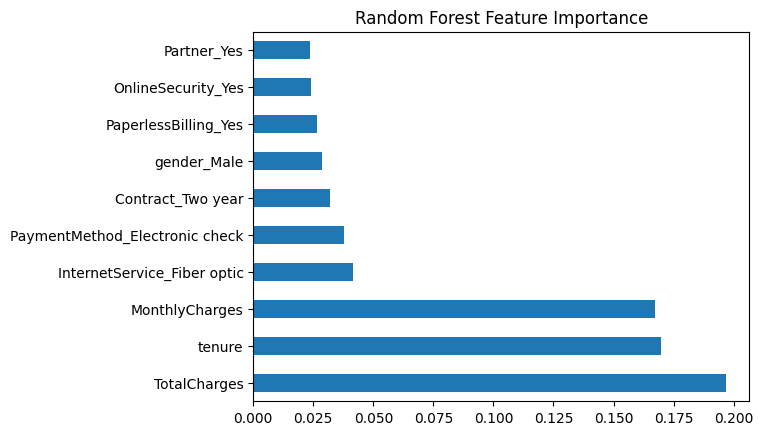

In [12]:
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features (Random Forest):")
print(rf_importance.head(10))

rf_importance.head(10).plot(kind='barh', title="Random Forest Feature Importance")
plt.show()

And now lets take a look at XGBoost

In [14]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


Top 10 Important Features (XGBoost):
InternetService_Fiber optic       0.334715
Contract_Two year                 0.182862
InternetService_No                0.152917
Contract_One year                 0.076980
tenure                            0.025021
PhoneService_Yes                  0.023437
StreamingMovies_Yes               0.022337
PaymentMethod_Electronic check    0.015277
MultipleLines_Yes                 0.013774
TechSupport_Yes                   0.013629
dtype: float32


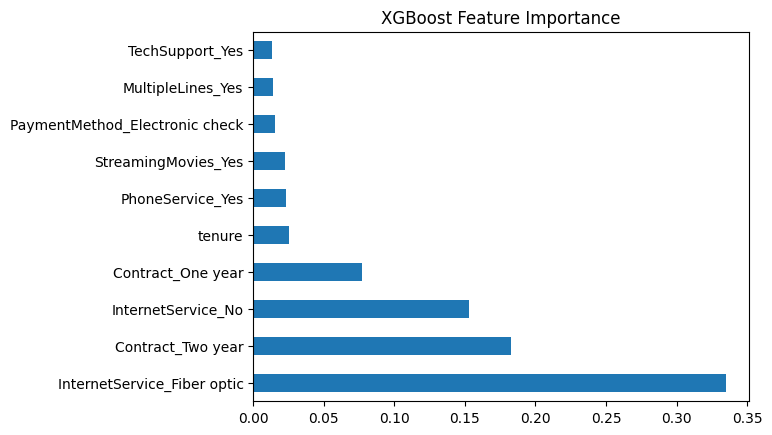

In [15]:
xgb_importance = pd.Series(XGB.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features (XGBoost):")
print(xgb_importance.head(10))

xgb_importance.head(10).plot(kind='barh', title="XGBoost Feature Importance")
plt.show()

Now lets retrain each model with theese parameters

In [16]:
#Logistic regression with best parameters
log_reg_best = LogisticRegression(C=100)
log_reg_best.fit(X_train,y_train)

y_pred_log_best = log_reg_best.predict(X_test)

print(accuracy_score(y_test,y_pred_log_best))
print(confusion_matrix(y_test,y_pred_log_best))
print(classification_report(y_test,y_pred_log_best))

0.8197303051809794
[[934 102]
 [152 221]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



        Model  Accuracy
0      LogReg   0.81973
1  LogRegBest   0.82115


<function matplotlib.pyplot.show(close=None, block=None)>

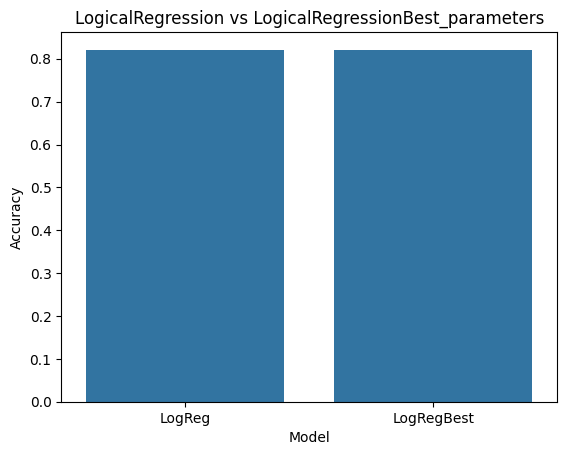

In [17]:
LogiclaRegressionModels = ['LogReg','LogRegBest']
LogRegParam = [
    accuracy_score(y_test,y_pred_log_best),
    accuracy_score(y_test,y_pred_log)
]

comparison = pd.DataFrame({'Model': LogiclaRegressionModels,'Accuracy' : LogRegParam})
print(comparison)
sns.barplot(x='Model',y='Accuracy',data=comparison)
plt.title('LogicalRegression vs LogicalRegressionBest_parameters')
plt.show

In conclussion the bettered model didnt have much affect on the Accuracy but its stll better and it isnt that difficult to implement so we can use it

In the following code segments we will aply the bettered parameters for RandomForest and XGBoost

In [19]:
rf_best = RandomForestClassifier(max_depth=15,min_samples_split=10,n_estimators=200)
rf_best.fit(X_train,y_train)

y_rf_pred_best = rf_best.predict(X_test)

print(accuracy_score(y_test,y_rf_pred_best))
print(confusion_matrix(y_test,y_rf_pred_best))
print(classification_report(y_test,y_pred_log_best))

0.8119233498935415
[[954  82]
 [183 190]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



   Models  Accuracies
0      RF    0.792761
1  RFBest    0.811923


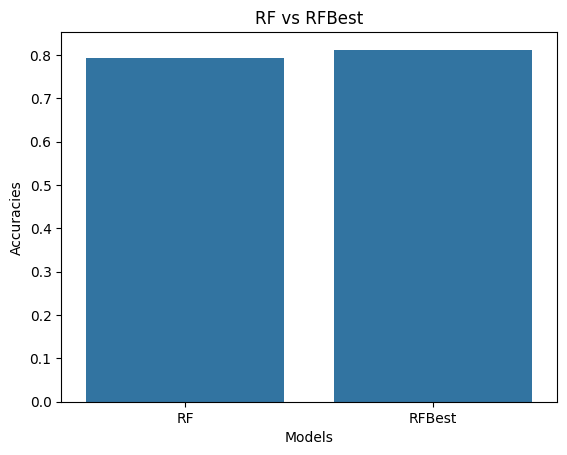

In [21]:
RfModels = ['RF', 'RFBest']
Accuracies = [
    accuracy_score(y_test,y_rf_pred),
    accuracy_score(y_test,y_rf_pred_best)
]

comparison = pd.DataFrame({'Models' : RfModels,'Accuracies': Accuracies})
print(comparison)
sns.barplot(x='Models',y='Accuracies',data=comparison)
plt.title('RF vs RFBest')
plt.show()

With the bettered parameters the Random forest shows better results which is expected

In [22]:
XGB_Best = XGBClassifier(learning_rate =0.2, max_depth=3, n_estimators=50)
XGB_Best.fit(X_train,y_train)

y_XGB_pred_best = XGB_Best.predict(X_test)

print(accuracy_score(y_test,y_XGB_pred_best))
print(confusion_matrix(y_test,y_XGB_pred_best))
print(classification_report(y_test,y_XGB_pred_best))

0.8147622427253371
[[940  96]
 [165 208]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



     Models  Accuracies
0       XGB    0.789212
1  XGB_Best    0.814762


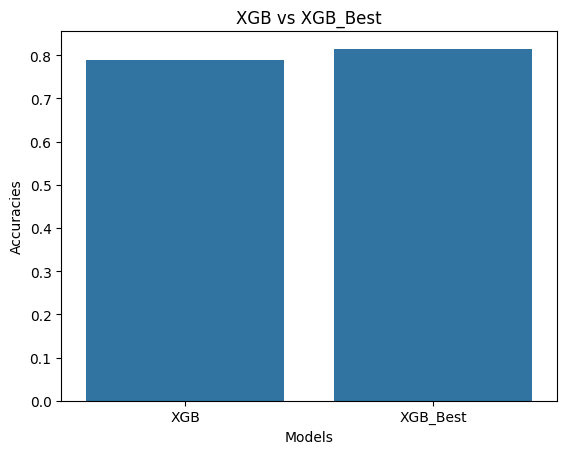

In [23]:
XGBModels = ['XGB', 'XGB_Best']
Accuracies = [
    accuracy_score(y_test,y_XGB_pred),
    accuracy_score(y_test,y_XGB_pred_best)
]

comparison = pd.DataFrame({'Models' : XGBModels,'Accuracies': Accuracies})
print(comparison)
sns.barplot(x='Models',y='Accuracies',data=comparison)
plt.title('XGB vs XGB_Best')
plt.show()

XGB also experences some better results, now lest compare all the bettered models and choose between them.

                  Models  Accuracies
0  LogiclaRegressionBest    0.819730
1       RandomForestBest    0.811923
2                XGBBest    0.814762


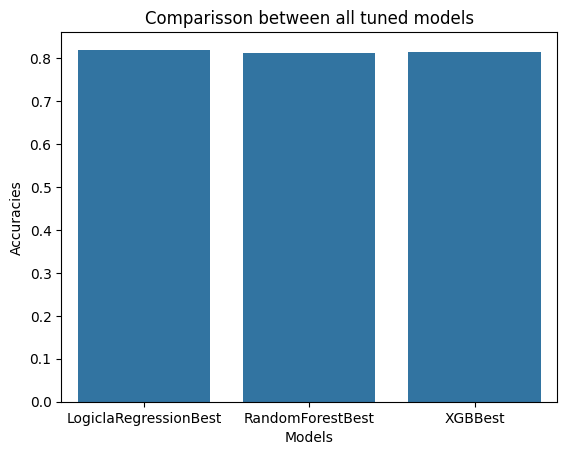

In [25]:
Models = ['LogiclaRegressionBest','RandomForestBest','XGBBest']
Accuracies = [
    accuracy_score(y_test,y_pred_log_best),
    accuracy_score(y_test,y_rf_pred_best),
    accuracy_score(y_test,y_XGB_pred_best)
]

comparison = pd.DataFrame({'Models' : Models,'Accuracies' : Accuracies})
print(comparison)
sns.barplot(x='Models',y='Accuracies',data=comparison)
plt.title('Comparisson between all tuned models')
plt.show()

After all that Logical Regression shows the best results and is the easiest to implement without any fine tuning, so we will stick with it and save the model